# Final Project: Home Credit Default Risk Competition

## *In this final project, we will build the best model (as judged by the ROC_AUC score) using the Home Credit default dataset. The objective of this data science project is to use historical loan application data to predict whether or not an applicant will be able to repay a loan. This is a standard supervised classification task:*
- Supervised: The labels are included in the training data and the goal is to train a model to learn to predict the labels from th饿features
- Classification: The label is a binary variable, 0 (will repay loan on time), 1 (will have difficulty repaying loan)

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv('./datasets/application_train.csv')

### EDA analysis

In [3]:
df.head().T

,0,1,2,3,4
SK_ID_CURR,100002,100003,100004,100006,100007
TARGET,1,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans
CODE_GENDER,M,F,M,F,M
FLAG_OWN_CAR,N,N,Y,N,N
...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.0,0.0,0.0,NaN,0.0
AMT_REQ_CREDIT_BUREAU_WEEK,0.0,0.0,0.0,NaN,0.0
AMT_REQ_CREDIT_BUREAU_MON,0.0,0.0,0.0,NaN,0.0
AMT_REQ_CREDIT_BUREAU_QRT,0.0,0.0,0.0,NaN,0.0


In [4]:
pd.set_option('display.max_rows', None)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [5]:
df.shape

(307511, 122)

## *Missing Values*

In [6]:
# A lot of missing values, how do we know if those are MCAR, MAR, MNAR and the treament to such.

# looks like majority of the columns related to large missing percentage are related to housing.

In [7]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        pd.set_option('display.max_rows', None)
        return mz_table.head(49)

mis_tb = missing_zero_values_table(df)
mis_tb

Your selected dataframe has 122 columns and 307511 Rows.
There are 67 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
COMMONAREA_MEDI,8691,214865,69.9,223556,72.7,float64
COMMONAREA_AVG,8442,214865,69.9,223307,72.6,float64
COMMONAREA_MODE,9690,214865,69.9,224555,73.0,float64
NONLIVINGAPARTMENTS_MEDI,56097,213514,69.4,269611,87.7,float64
NONLIVINGAPARTMENTS_MODE,59255,213514,69.4,272769,88.7,float64
NONLIVINGAPARTMENTS_AVG,54549,213514,69.4,268063,87.2,float64
FONDKAPREMONT_MODE,0,210295,68.4,210295,68.4,object
LIVINGAPARTMENTS_MODE,519,210199,68.4,210718,68.5,float64
LIVINGAPARTMENTS_MEDI,433,210199,68.4,210632,68.5,float64
LIVINGAPARTMENTS_AVG,418,210199,68.4,210617,68.5,float64


In [8]:
df.shape

(307511, 122)

In [9]:
# reset display
pd.reset_option('display')

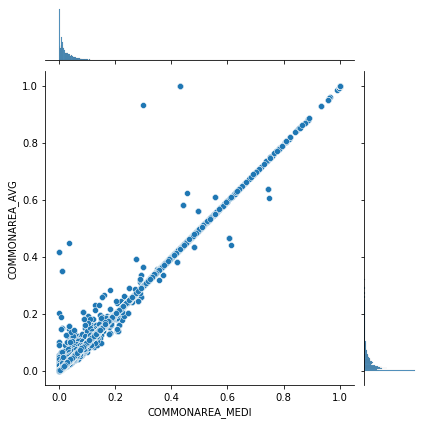

In [10]:
sns.jointplot(x = "COMMONAREA_MEDI", y = "COMMONAREA_AVG", data = df)

In [11]:
# looks like columns related to housing property are somewhat related to this 
(df['FLAG_OWN_REALTY']=='Y').sum()/len(df)

0.6936727466659729

In [12]:
lis = (list(mis_tb.index))

In [13]:
# dropping 49 columns with missing values over 47%
for i in lis:
    df.drop(columns=i, inplace=True)

## *1. Columns That Contain a Single Value*

In [14]:
# When a predictor contains a single value, we call this a zero-variance predictor because there truly
# is no variation displayed by the predictor.

In [15]:
for i in df.columns:
    if df[i].nunique() == 1:
        print(i)

## *2. Find columns with low Variance*

In [16]:
def corrTarget(dataframe,column_list):
    corr=dataframe[column_list].corr()
    if len(column_list)>8:
        plt.figure(figsize=(20,13))
    else:
        plt.figure(figsize=(10,8))
    sns.heatmap(corr,
               xticklabels = corr.columns,
               yticklabels = corr.columns,
               annot=True,
               cmap="RdYlGn",
               linewidth=1)
    plt.title(("Finding Correlation"),fontdict={'fontsize':15,'fontweight':5, 'color': 'Black'})
    plt.show()

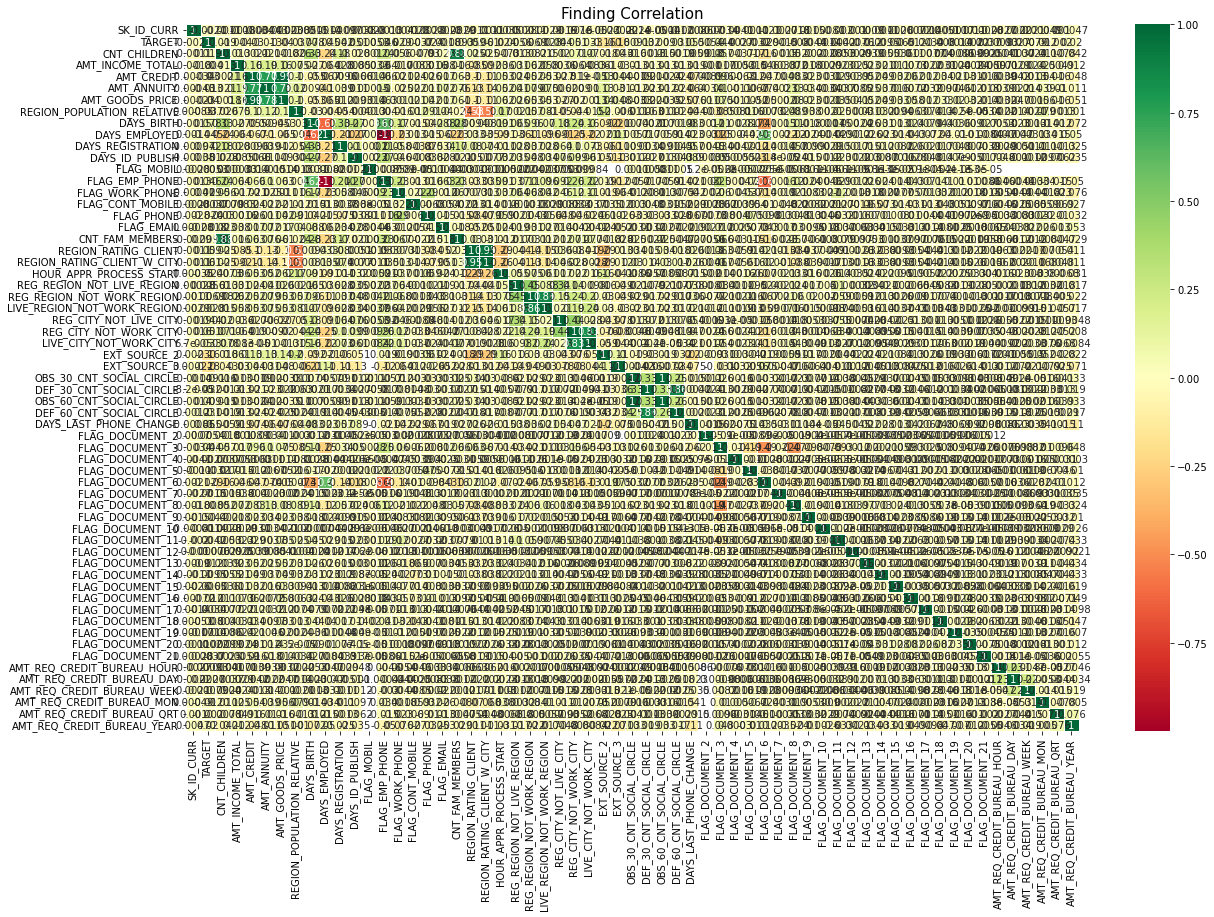

In [17]:
corrTarget(df, df.columns)

### *If I understand you well, you are asking if you can remove features having zero-correlation either :*
### *https://datascience.stackexchange.com/questions/40602/can-we-remove-features-that-have-zero-correlation-with-the-target-label*
### With other features
### With the label you want to predict

#### Those are two different cases :

1. We usually recommend to remove features having correlation between them (stabilize the model). If they are ZERO-correlated, you cannot conclude here. This is by training your model that you will see is the feature is worth or not.

Don't drop those ones.


2. If a feature is strongly correlated with your label, this means a linear function (or model) should be able to predict well the latter. Even if it is not correlated, it doesn't tell you that a non-linear model wouldn't perform well by using this feature.

In [18]:
pd.set_option('display.max_rows', None)
df.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
AMT_ANNUITY,-0.000433,-0.012817,0.021374,0.191657,0.770138,1.000000,0.775109,0.118429,0.009445,-0.104332,...,-0.009745,0.004573,0.011718,-0.017598,0.003861,0.002185,0.013881,0.039148,0.010124,-0.011320
AMT_GOODS_PRICE,-0.000232,-0.039645,-0.001827,0.159610,0.986968,0.775109,1.000000,0.103520,-0.053442,-0.064842,...,0.032748,0.020279,0.031640,-0.014486,-0.003237,0.004677,-0.001007,0.056422,0.016432,-0.050998
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,0.118429,0.103520,1.000000,-0.029582,-0.003980,...,0.013367,0.002364,-0.000045,0.003437,-0.002225,0.001399,-0.002149,0.078607,-0.001279,0.001003
DAYS_BIRTH,-0.001500,0.078239,0.330938,0.027261,-0.055436,0.009445,-0.053442,-0.029582,1.000000,-0.615864,...,0.044498,0.003614,0.009015,0.027282,0.005285,0.002255,-0.001336,0.001372,-0.011799,-0.071983
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.064223,-0.066838,-0.104332,-0.064842,-0.003980,-0.615864,1.000000,...,-0.040396,-0.010040,-0.010135,-0.008396,-0.004735,0.000472,0.003072,-0.034457,0.015345,0.049988


## *3. Remove Duplicate data*

In [19]:
# Rows with duplicate data --- 'NONE FOUND'

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 73)


In [20]:
# Univariate analysis

/Users/zheng/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

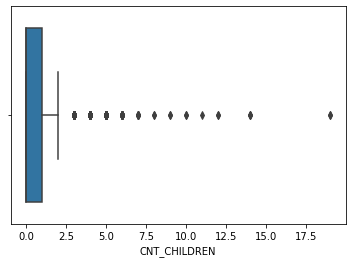

In [21]:
# only a few outlier, small impact
sns.boxplot(df['CNT_CHILDREN'])
df['CNT_CHILDREN'].value_counts()

/Users/zheng/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

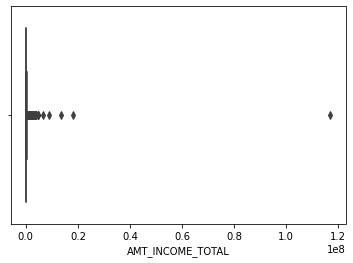

In [22]:
sns.boxplot(df['AMT_INCOME_TOTAL'])
df['AMT_INCOME_TOTAL'].nunique()
df['AMT_INCOME_TOTAL'].describe()

In [23]:
# get 95% income
df['AMT_INCOME_TOTAL'].quantile(0.95)

337500.0

In [24]:
# find number of outliers , greater than 95%
(df[df['AMT_INCOME_TOTAL'] > 337500].AMT_INCOME_TOTAL).count()

14035

In [25]:
df['AMT_INCOME_TOTAL'].skew()

391.5596541041876

In [26]:
# replace outliers with 95% value
df['AMT_INCOME_TOTAL'] = np.where(df['AMT_INCOME_TOTAL']> 337500, 337500,df['AMT_INCOME_TOTAL'])

In [27]:
df['AMT_INCOME_TOTAL'].skew()

0.7836879848099682

/Users/zheng/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

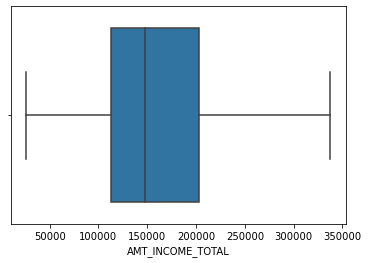

In [28]:
sns.boxplot(df['AMT_INCOME_TOTAL'])

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

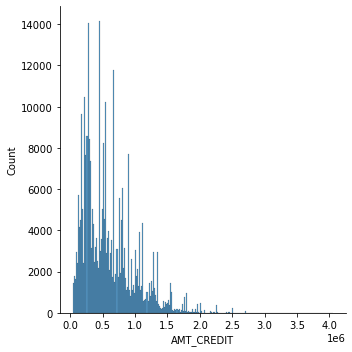

In [29]:
# ok
sns.displot(df['AMT_CREDIT'])
df['AMT_CREDIT'].describe()

In [30]:
df['AMT_CREDIT'].skew()

1.2347784971349398

/Users/zheng/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

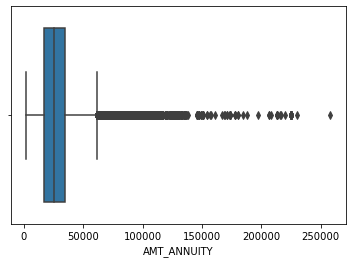

In [31]:
#

sns.boxplot(df['AMT_ANNUITY'])
df['AMT_ANNUITY'].describe()


In [32]:
df['AMT_ANNUITY'].isna().sum()

12

In [33]:
df['AMT_ANNUITY'].skew()

1.5797773638612507

/Users/zheng/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

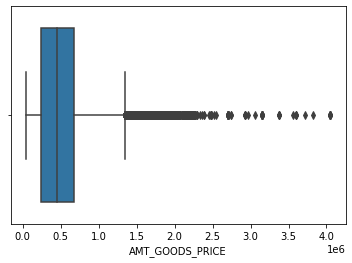

In [34]:
#

sns.boxplot(df['AMT_GOODS_PRICE'])
df['AMT_GOODS_PRICE'].describe()

In [35]:
df['AMT_GOODS_PRICE'].skew()

1.3490003414747445

<AxesSubplot:xlabel='TARGET', ylabel='AMT_GOODS_PRICE'>

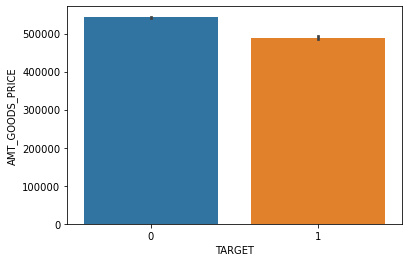

In [36]:
sns.barplot(y=df['AMT_GOODS_PRICE'],x=df['TARGET'],data=df)

/Users/zheng/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='REGION_POPULATION_RELATIVE'>

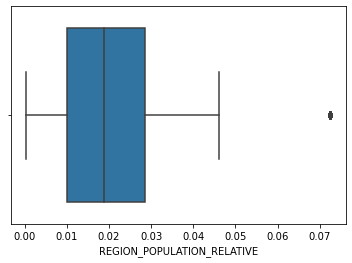

In [37]:
sns.boxplot(df['REGION_POPULATION_RELATIVE'])

In [38]:
df['REGION_POPULATION_RELATIVE'].skew()

1.4880085207077665

In [39]:
df['REGION_POPULATION_RELATIVE'].quantile(0.99)

0.072508

In [40]:
df.drop(df[df['REGION_POPULATION_RELATIVE']>=0.072508].index, inplace = True)

In [41]:
df['REGION_POPULATION_RELATIVE'].skew()

0.534630946401583

In [42]:
df['DAYS_BIRTH'].skew()

-0.11835052747368173

In [43]:
df['DAYS_EMPLOYED'].skew()

1.6690101901446672

/Users/zheng/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DAYS_EMPLOYED'>

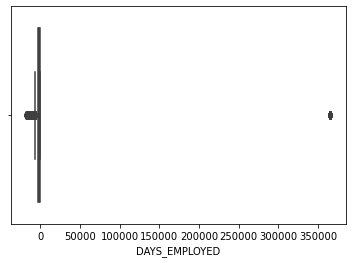

In [44]:
sns.boxplot(df['DAYS_EMPLOYED'])

In [45]:
df['DAYS_EMPLOYED'].quantile(0.75)

-291.0

In [46]:
(df[df['DAYS_EMPLOYED']>-291].DAYS_EMPLOYED).count()

74736

In [47]:
df['DAYS_EMPLOYED'] = np.where(df['DAYS_EMPLOYED']> 0, 1,df['AMT_INCOME_TOTAL'])

In [48]:
df['DAYS_EMPLOYED'].skew()

0.23691543262404816

In [49]:
df['DAYS_REGISTRATION'].skew()

-0.5963257096023807

In [50]:
# get cols with skewness larger than |2|
col_to_treat = []
for i in df.columns:
    if df[i].dtypes != object:
        if df[i].skew() > 2 or df[i].skew() < -2:
            col_to_treat.append(i)
            print(f'{i} : ||NULL: {df[i].isnull().sum()}|| == ||unique|| {df[i].nunique()} ||==|| {df[i].skew()},')

TARGET : ||NULL: 0|| == ||unique|| 2 ||==|| 3.0498995596262133,
FLAG_MOBIL : ||NULL: 0|| == ||unique|| 2 ||==|| -546.8994423109239,
FLAG_CONT_MOBILE : ||NULL: 0|| == ||unique|| 2 ||==|| -23.805877920675403,
FLAG_EMAIL : ||NULL: 0|| == ||unique|| 2 ||==|| 3.901673266632143,
REG_REGION_NOT_LIVE_REGION : ||NULL: 0|| == ||unique|| 2 ||==|| 8.168171342693528,
REG_REGION_NOT_WORK_REGION : ||NULL: 0|| == ||unique|| 2 ||==|| 4.125785892989827,
LIVE_REGION_NOT_WORK_REGION : ||NULL: 0|| == ||unique|| 2 ||==|| 4.720145403282221,
REG_CITY_NOT_LIVE_CITY : ||NULL: 0|| == ||unique|| 2 ||==|| 3.102330330293409,
OBS_30_CNT_SOCIAL_CIRCLE : ||NULL: 922|| == ||unique|| 33 ||==|| 12.222880270921605,
DEF_30_CNT_SOCIAL_CIRCLE : ||NULL: 922|| == ||unique|| 10 ||==|| 5.1693882872903565,
OBS_60_CNT_SOCIAL_CIRCLE : ||NULL: 922|| == ||unique|| 33 ||==|| 12.153860969330417,
DEF_60_CNT_SOCIAL_CIRCLE : ||NULL: 922|| == ||unique|| 9 ||==|| 5.24972636231769,
FLAG_DOCUMENT_2 : ||NULL: 0|| == ||unique|| 2 ||==|| 151.673

In [51]:
to_drop = ['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON']
df.drop(columns = to_drop, inplace=True)

In [52]:
#from sklearn.impute import SimpleImputer 
#imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [53]:
#imp.fit(df)

### numerical and categorical

In [54]:
df.drop(columns='SK_ID_CURR', inplace=True)

In [55]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(df)
categorical_columns = categorical_columns_selector(df)

In [56]:
df[numerical_columns].nunique()

TARGET                              2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2161
AMT_CREDIT                       5509
AMT_ANNUITY                     13488
AMT_GOODS_PRICE                   996
REGION_POPULATION_RELATIVE         80
DAYS_BIRTH                      17456
DAYS_EMPLOYED                    1903
DAYS_REGISTRATION               15601
DAYS_ID_PUBLISH                  6161
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
CNT_FAM_MEMBERS                    17
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NO

In [57]:
df.dtypes

TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                  float64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL               

In [58]:
# convert some numerical to categorical
for i in numerical_columns:
    if df[i].nunique() < 4:
        df[i] = df[i].astype('object')
    elif df[i].dtypes == 'int64':
        df[i] = df[i].astype('float')

In [59]:
df.dtypes

TARGET                          object
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                   float64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                     float64
DAYS_EMPLOYED                  float64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                float64
FLAG_MOBIL                      object
FLAG_EMP_PHONE                  object
FLAG_WORK_PHONE                 object
FLAG_CONT_MOBILE                object
FLAG_PHONE                      object
FLAG_EMAIL               

In [60]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(df)
categorical_columns = categorical_columns_selector(df)

In [61]:
df[numerical_columns].isna().sum()

CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      11
AMT_GOODS_PRICE                 274
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
CNT_FAM_MEMBERS                   2
HOUR_APPR_PROCESS_START           0
EXT_SOURCE_2                    641
EXT_SOURCE_3                  59055
OBS_30_CNT_SOCIAL_CIRCLE        922
DEF_30_CNT_SOCIAL_CIRCLE        922
OBS_60_CNT_SOCIAL_CIRCLE        922
DEF_60_CNT_SOCIAL_CIRCLE        922
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_YEAR    40230
dtype: int64

In [65]:
df.isna().sum()

TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       11
AMT_GOODS_PRICE                  274
NAME_TYPE_SUITE                 1252
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                93147
C

In [66]:
df.drop(columns=['AMT_REQ_CREDIT_BUREAU_YEAR','EXT_SOURCE_3'], inplace=True)

In [67]:
cols = ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']

In [68]:
for i in cols:
    df[i].fillna(value= 1, inplace=True)

In [69]:
df['DAYS_LAST_PHONE_CHANGE'].fillna(value=0, inplace=True)

In [70]:
df['OCCUPATION_TYPE'].fillna(value='10', inplace=True)

In [71]:
df.drop(columns=['EXT_SOURCE_2'], inplace=True)

In [72]:
df.dropna(axis=0, how='any', inplace=True)

In [127]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
transformer = make_column_transformer(
    (MinMaxScaler(), selector(dtype_exclude=object)),
    (OneHotEncoder(handle_unknown='ignore'), selector(dtype_include=object))
)

In [128]:
from sklearn.model_selection import train_test_split
X = df.drop('TARGET', axis=1)
y = df['TARGET']
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [129]:
# Fit
transformer.fit(X_train)
# Apply the transformation
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [123]:
X_train.shape

(238268, 211)

In [77]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(solver='liblinear', random_state=1,max_iter=3000)

In [78]:
lg.fit(X_train,y_train)

LogisticRegression(max_iter=3000, random_state=1, solver='liblinear')

In [79]:
y_pred = lg.predict(X_test)

In [80]:
y_pred.var()

0.0

In [81]:
lg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 3000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [83]:
cm

array([[54820,     0],
       [ 4748,     0]])

# XGBoost

In [84]:
import xgboost as xgb
import sklearn
print("XGB Version          : ", xgb.__version__)
print("Scikit-Learn Version : ", sklearn.__version__)

XGB Version          :  1.6.1
Scikit-Learn Version :  1.0.2


In [135]:
dmat_train = xgb.DMatrix(X_train, y_train)
dmat_test = xgb.DMatrix(X_test, y_test)

In [136]:
booster = xgb.train({'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'},
                    dmat_train,
                    evals=[(dmat_train, "train"), (dmat_test, "test")])

[0]	train-logloss:0.30806	test-logloss:0.30339
[1]	train-logloss:0.28135	test-logloss:0.27523
[2]	train-logloss:0.27774	test-logloss:0.27154
[3]	train-logloss:0.27579	test-logloss:0.26941
[4]	train-logloss:0.27449	test-logloss:0.26820
[5]	train-logloss:0.27350	test-logloss:0.26696
[6]	train-logloss:0.27276	test-logloss:0.26623
[7]	train-logloss:0.27208	test-logloss:0.26533
[8]	train-logloss:0.27126	test-logloss:0.26488
[9]	train-logloss:0.27073	test-logloss:0.26458


In [137]:
print("\nTrain RMSE : ",booster.eval(dmat_train))
print("Test  RMSE : ",booster.eval(dmat_test))


Train RMSE :  [0]	eval-logloss:0.27073079564924285
Test  RMSE :  [0]	eval-logloss:0.26458336886444650


In [138]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

train_preds = [1 if pred>0.5 else 0 for pred in booster.predict(data=dmat_train)]
test_preds = [1 if pred>0.5 else 0 for pred in booster.predict(data=dmat_test)]

print("\nTest  Accuracy : %.2f"%accuracy_score(y_test, test_preds))
print("Train Accuracy : %.2f"%accuracy_score(y_train, train_preds))

print("\nConfusion Matrix : ")
print(confusion_matrix(y_test, test_preds))

print("\nClassification Report : ")
print(classification_report(y_test, test_preds))


Test  Accuracy : 0.92
Train Accuracy : 0.92

Confusion Matrix : 
[[54820     0]
 [ 4748     0]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     54820
           1       0.00      0.00      0.00      4748

    accuracy                           0.92     59568
   macro avg       0.46      0.50      0.48     59568
weighted avg       0.85      0.92      0.88     59568



/Users/zheng/tensorflow-test/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zheng/tensorflow-test/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zheng/tensorflow-test/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest

In [140]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

In [141]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [142]:
rf_y_pred = rf.predict(X_test)

In [149]:
cm = confusion_matrix(y_test, rf_y_pred)
cm

array([[54820,     0],
       [ 4748,     0]])

# Web service

In [150]:
import joblib
joblib.dump(rf, "model.pkl")

['model.pkl']

In [151]:
saved_model = joblib.load("model.pkl")

In [158]:
X_test

<59568x211 sparse matrix of type '<class 'numpy.float64'>'
	with 3517063 stored elements in Compressed Sparse Row format>

In [159]:
saved_model.predict([X_test.todense().iloc[3776,]])

AttributeError: 'matrix' object has no attribute 'iloc'